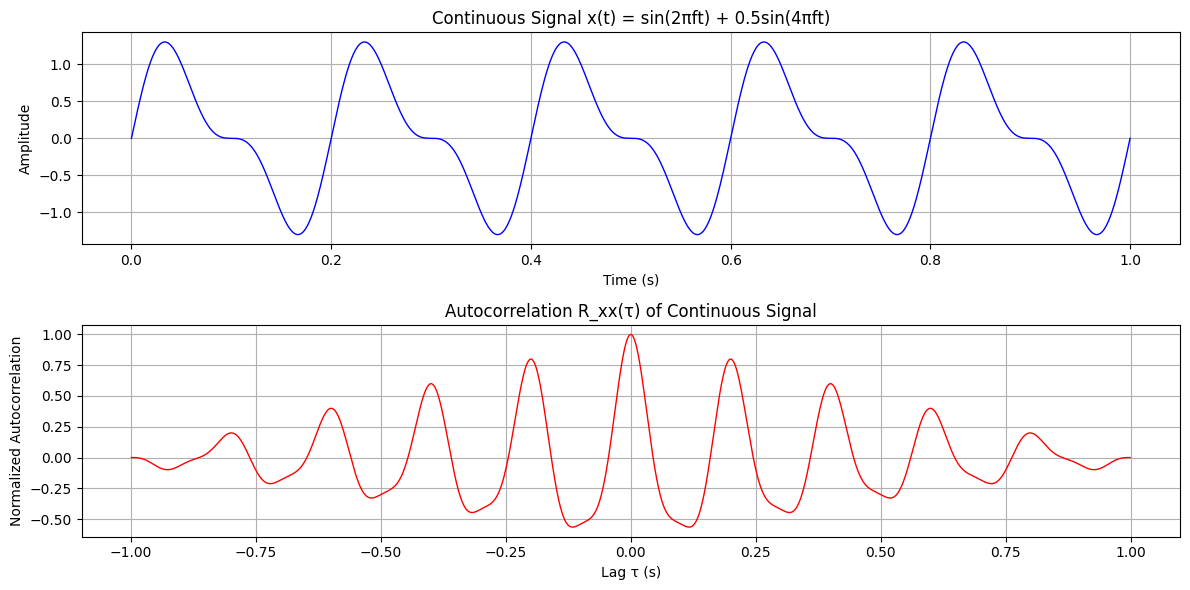

Peak autocorrelation at lag 0: 1.0


In [1]:
# Autocorrelation of Continuous Signal
import numpy as np
import matplotlib.pyplot as plt

# Generate a continuous signal (simulated with high sampling rate)
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time vector (1 second)
f = 5  # Signal frequency (5 Hz)

# Continuous signal: sum of sinusoids
x_continuous = np.sin(2 * np.pi * f * t) + 0.5 * np.sin(2 * np.pi * 2 * f * t)

# Autocorrelation of continuous signal
def autocorrelation_continuous(x):
    """
    Compute autocorrelation of a continuous signal.
    R_xx(τ) = ∫ x(t) * x(t + τ) dt
    """
    n = len(x)
    autocorr = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
    autocorr = autocorr / autocorr[n - 1]  # Normalize
    return autocorr

autocorr_cont = autocorrelation_continuous(x_continuous)
lags_cont = np.arange(-len(x_continuous) + 1, len(x_continuous)) / fs

# Plot continuous signal and its autocorrelation
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].plot(t, x_continuous, 'b-', linewidth=1)
axes[0].set_title('Continuous Signal x(t) = sin(2πft) + 0.5sin(4πft)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

axes[1].plot(lags_cont, autocorr_cont, 'r-', linewidth=1)
axes[1].set_title('Autocorrelation R_xx(τ) of Continuous Signal')
axes[1].set_xlabel('Lag τ (s)')
axes[1].set_ylabel('Normalized Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("Peak autocorrelation at lag 0:", autocorr_cont[len(x_continuous) - 1])

In [ ]:
# Autocorrelation of Discrete Signal
import numpy as np
import matplotlib.pyplot as plt

# Define a discrete signal
x_discrete = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Manual Autocorrelation Implementation for Discrete Signal
def autocorrelation_discrete(x):
    """
    Compute autocorrelation of a discrete signal manually.
    R_xx[k] = Σ x[n] * x[n + k]
    """
    N = len(x)
    result_length = 2 * N - 1
    autocorr = np.zeros(result_length)
    
    # Pad signal with zeros
    x_padded = np.concatenate([np.zeros(N - 1), x, np.zeros(N - 1)])
    
    for k in range(result_length):
        for n in range(N):
            autocorr[k] += x[n] * x_padded[k + n]
    
    return autocorr

# Compute autocorrelation manually
manual_autocorr = autocorrelation_discrete(x_discrete)

# Compute using NumPy for verification
numpy_autocorr = np.correlate(x_discrete, x_discrete, mode='full')

# Generate lag indices
lags_discrete = np.arange(-(len(x_discrete) - 1), len(x_discrete))

# Display results
print("Discrete Signal x[n]:", x_discrete)
print("\nManual Autocorrelation R_xx[k]:", manual_autocorr)
print("NumPy Autocorrelation R_xx[k]: ", numpy_autocorr)

# Plot the discrete signal and its autocorrelation
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot discrete signal
axes[0].stem(range(len(x_discrete)), x_discrete)
axes[0].set_title('Discrete Signal x[n]')
axes[0].set_xlabel('Sample n')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)

# Plot autocorrelation
axes[1].stem(lags_discrete, manual_autocorr)
axes[1].set_title('Autocorrelation R_xx[k] of Discrete Signal')
axes[1].set_xlabel('Lag k')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)
axes[1].axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Zero lag')
axes[1].legend()

plt.tight_layout()
plt.show()

# Properties of Autocorrelation
print("\n--- Properties of Autocorrelation ---")
print(f"1. Maximum at lag 0: R_xx[0] = {manual_autocorr[len(x_discrete)-1]}")
print(f"2. Symmetric: R_xx[k] = R_xx[-k]")
print(f"   R_xx[1] = {manual_autocorr[len(x_discrete)]}, R_xx[-1] = {manual_autocorr[len(x_discrete)-2]}")